In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from prettytable import PrettyTable 
import time

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Process data

In [3]:
df["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [4]:
X = df.drop(["fetal_health"], axis=1)
y = df['fetal_health']

In [5]:
y = LabelEncoder().fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

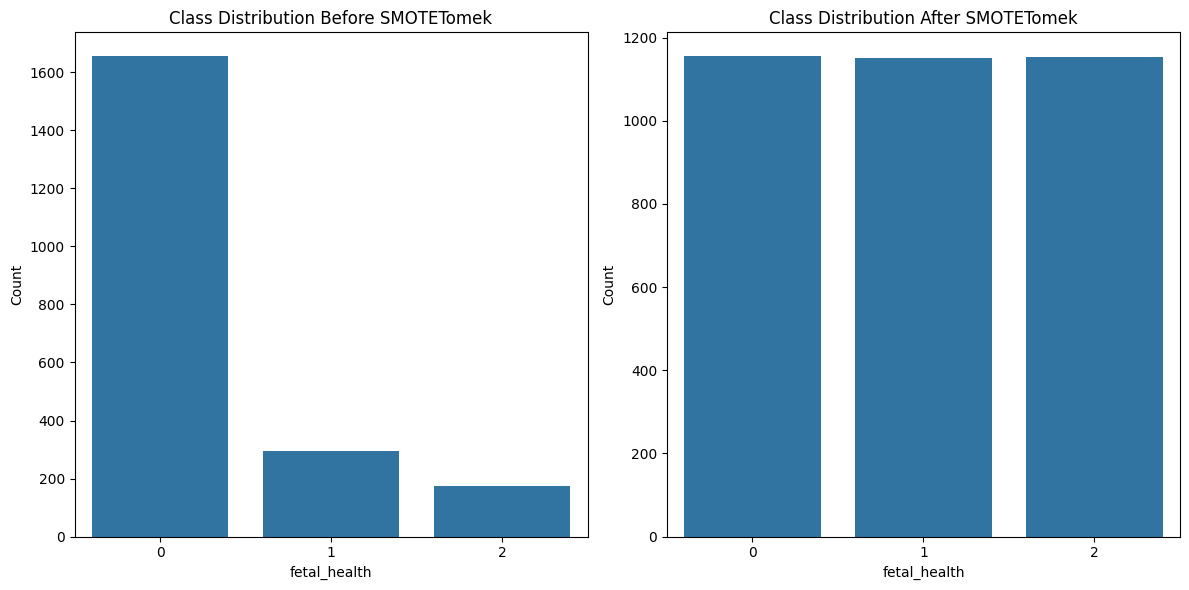

In [7]:
smote = SMOTETomek(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x = y, ax=axes[0])
axes[0].set(title="Class Distribution Before SMOTETomek", xlabel="fetal_health", ylabel="Count")

sns.countplot(x = y_train, ax=axes[1])
axes[1].set(title="Class Distribution After SMOTETomek", xlabel="fetal_health", ylabel="Count")

plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [10]:
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (3461, 21)
Shape of x_test: (638, 21)
Shape of y_train: (3461,)
Shape of y_test: (638,)


## Train model ML

#### KNN 

In [11]:
knn = KNeighborsClassifier()
train_times = []
start = time.time()
knn.fit(X_train, y_train)
acc = accuracy_score(y_test, knn.predict(X_test))
pre = precision_score(y_test, knn.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, knn.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, knn.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, knn.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['KNN'])
print(df_results)
print()
print(classification)

         Time  Accuracy  Precision    Recall       F1
KNN  0.388948  0.855799   0.892314  0.855799  0.86647

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       496
           1       0.56      0.82      0.66       101
           2       0.69      0.88      0.77        41

    accuracy                           0.86       638
   macro avg       0.74      0.85      0.78       638
weighted avg       0.89      0.86      0.87       638



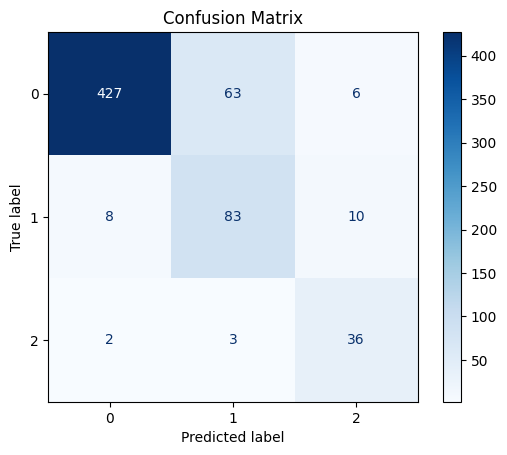

In [13]:
cm = confusion_matrix(y_test, knn.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

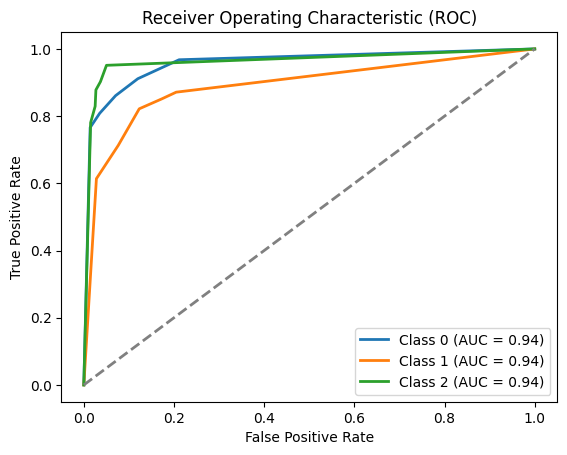

AUC: 0.94


In [14]:
y_prob = knn.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(knn.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(knn.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [16]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40]
}

knn_model = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for KNN:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in knn_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for KNN: {:.4f}".format(knn_grid_search.best_score_))

Best Hyperparameters for KNN:
+-------------+-----------+
|  Parameter  |   Value   |
+-------------+-----------+
|  algorithm  |    auto   |
|  leaf_size  |     10    |
|    metric   | manhattan |
| n_neighbors |     3     |
|      p      |     1     |
|   weights   |  distance |
+-------------+-----------+
Best Accuracy for KNN: 0.9695


In [17]:
cv_scores = cross_val_score(KNeighborsClassifier(**knn_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best KNN Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best KNN Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9700
CV Standard Deviation: 0.0050


#### LogisticRegression

In [12]:
logis = LogisticRegression()
train_times = []
start = time.time()
logis.fit(X_train, y_train)
acc = accuracy_score(y_test, logis.predict(X_test))
pre = precision_score(y_test, logis.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, logis.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, logis.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, logis.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['LogisticRegression'])
print(df_results)
print()
print(classification)

                       Time  Accuracy  Precision    Recall        F1
LogisticRegression  0.02908  0.836991   0.880686  0.836991  0.850735

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       496
           1       0.53      0.76      0.63       101
           2       0.54      0.80      0.65        41

    accuracy                           0.84       638
   macro avg       0.68      0.81      0.73       638
weighted avg       0.88      0.84      0.85       638



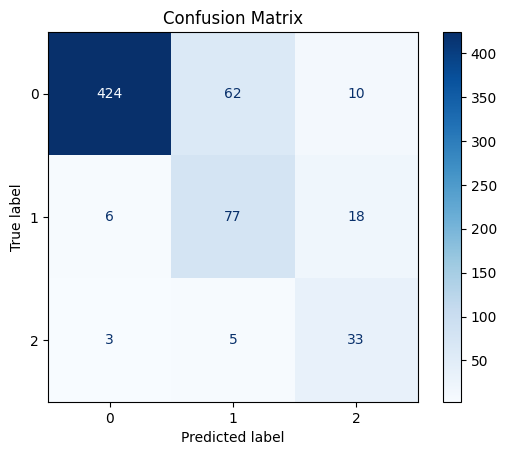

In [16]:
cm = confusion_matrix(y_test, logis.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

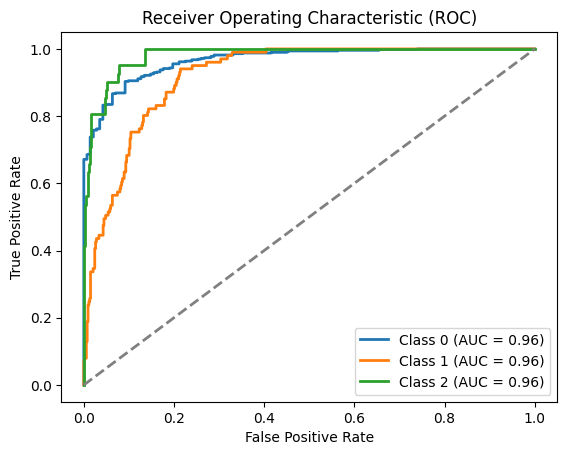

AUC: 0.96


In [17]:
y_prob = logis.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(logis.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(logis.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [21]:
logis_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False],
    'l1_ratio': [None, 0.1, 0.5, 0.9]
}

logis_model = LogisticRegression()
logis_grid_search = GridSearchCV(logis_model, logis_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
logis_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for LogisticRegression:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in logis_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for LogisticRegression: {:.4f}".format(logis_grid_search.best_score_))

Best Hyperparameters for LogisticRegression:
+---------------+-------+
|   Parameter   | Value |
+---------------+-------+
|       C       |  100  |
|  class_weight |  None |
| fit_intercept |  True |
|    l1_ratio   |  None |
|    max_iter   |  500  |
|    penalty    |   l1  |
|     solver    |  saga |
+---------------+-------+
Best Accuracy for LogisticRegression: 0.8867


In [22]:
cv_scores = cross_val_score(LogisticRegression(**logis_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best LogisticRegression Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best LogisticRegression Model - Cross-Validation Scores:
CV Mean Accuracy: 0.8870
CV Standard Deviation: 0.0100


#### DecisionTreeClassifier

In [13]:
decision = DecisionTreeClassifier()
train_times = []
start = time.time()
decision.fit(X_train, y_train)
acc = accuracy_score(y_test, decision.predict(X_test))
pre = precision_score(y_test, decision.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, decision.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, decision.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, decision.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['DecisionTreeClassifier'])
print(df_results)
print()
print(classification)

                            Time  Accuracy  Precision    Recall        F1
DecisionTreeClassifier  0.043395  0.901254   0.905491  0.901254  0.902612

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       496
           1       0.75      0.73      0.74       101
           2       0.67      0.85      0.75        41

    accuracy                           0.90       638
   macro avg       0.79      0.84      0.81       638
weighted avg       0.91      0.90      0.90       638



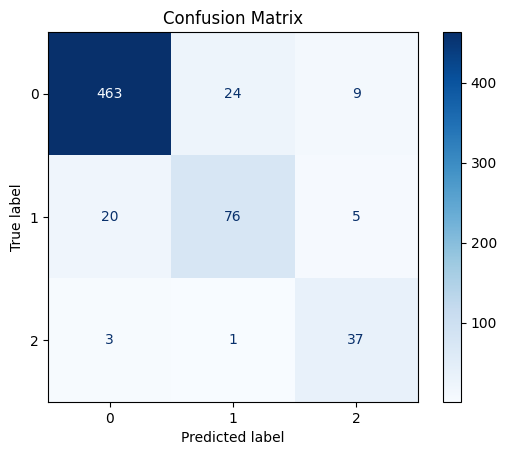

In [19]:
cm = confusion_matrix(y_test, decision.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

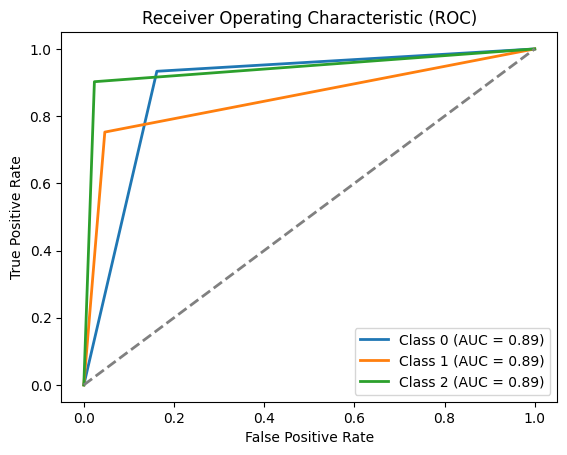

AUC: 0.89


In [20]:
y_prob = decision.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(decision.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(decision.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [26]:
decision_param_grid = {
    'criterion': ['gini', 'entropy'],                
    'splitter': ['best', 'random'],                    
    'max_depth': [None, 3, 5, 10, 20],                 
    'min_samples_split': [2, 5, 10],                 
    'min_samples_leaf': [1, 2, 4],                   
    'max_features': [None, 'sqrt', 'log2'],         
    'class_weight': [None, 'balanced'],              
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],       
    'ccp_alpha': [0.0, 0.01, 0.1]                  
}

decision_model = DecisionTreeClassifier()
decision_grid_search = GridSearchCV(decision_model, decision_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
decision_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for Decision Tree:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in decision_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for Decision Tree: {:.4f}".format(decision_grid_search.best_score_))

Best Hyperparameters for Decision Tree:
+--------------------------+---------+
|        Parameter         |  Value  |
+--------------------------+---------+
|        ccp_alpha         |   0.0   |
|       class_weight       |   None  |
|        criterion         | entropy |
|        max_depth         |    20   |
|       max_features       |   None  |
|     min_samples_leaf     |    1    |
|    min_samples_split     |    2    |
| min_weight_fraction_leaf |   0.0   |
|         splitter         |   best  |
+--------------------------+---------+
Best Accuracy for Decision Tree: 0.9580


In [27]:
cv_scores = cross_val_score(DecisionTreeClassifier(**decision_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best Decision Tree Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best Decision Tree Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9570
CV Standard Deviation: 0.0080


#### RandomForestClassifier

In [14]:
rf = RandomForestClassifier()
train_times = []
start = time.time()
rf.fit(X_train, y_train)
acc = accuracy_score(y_test, rf.predict(X_test))
pre = precision_score(y_test, rf.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, rf.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, rf.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, rf.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['RandomForestClassifier'])
print(df_results)
print()
print(classification)

                            Time  Accuracy  Precision    Recall        F1
RandomForestClassifier  0.591564  0.934169   0.935172  0.934169  0.934279

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       496
           1       0.82      0.79      0.80       101
           2       0.81      0.95      0.88        41

    accuracy                           0.93       638
   macro avg       0.87      0.90      0.88       638
weighted avg       0.94      0.93      0.93       638



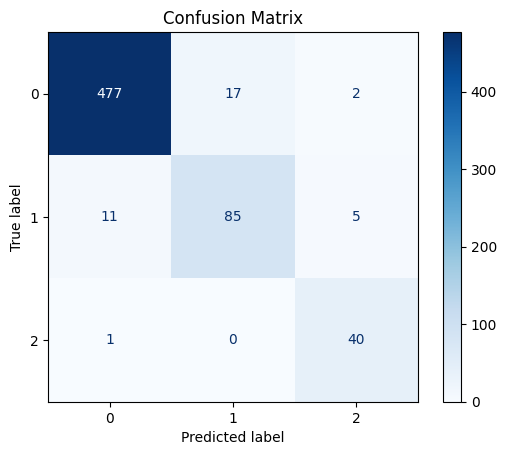

In [22]:
cm = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

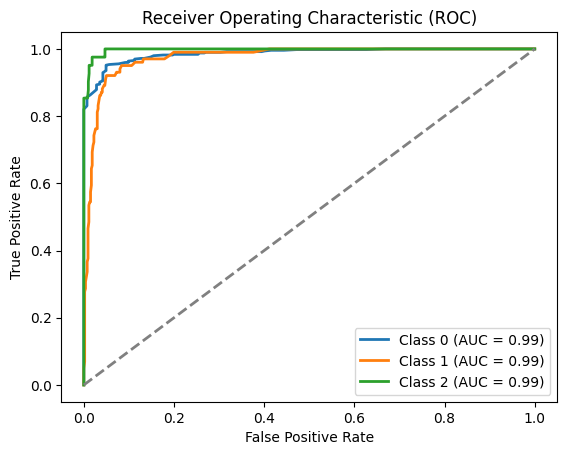

AUC: 0.99


In [23]:
y_prob = rf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(rf.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(rf.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],          
    'max_depth': [10, 20, 30, 50, None],         
    'min_samples_split': [2, 5, 10, 20],          
    'min_samples_leaf': [1, 2, 4, 8],   
    'criterion': ['gini', 'entropy', 'log_loss'],        
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in rf_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for Random Forest: {:.4f}".format(rf_grid_search.best_score_))

In [ ]:
cv_scores = cross_val_score(RandomForestClassifier(**rf_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best Random Forest Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best Decision Tree Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9540
CV Standard Deviation: 0.0070


#### SVM

In [15]:
svm = SVC(probability=True)
train_times = []
start = time.time()
svm.fit(X_train, y_train)
acc = accuracy_score(y_test, svm.predict(X_test))
pre = precision_score(y_test, svm.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, svm.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, svm.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, svm.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['SVM'])
print(df_results)
print()
print(classification)

         Time  Accuracy  Precision    Recall        F1
SVM  0.618462  0.862069   0.895241  0.862069  0.872276

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       496
           1       0.57      0.79      0.66       101
           2       0.65      0.88      0.75        41

    accuracy                           0.86       638
   macro avg       0.73      0.85      0.78       638
weighted avg       0.90      0.86      0.87       638



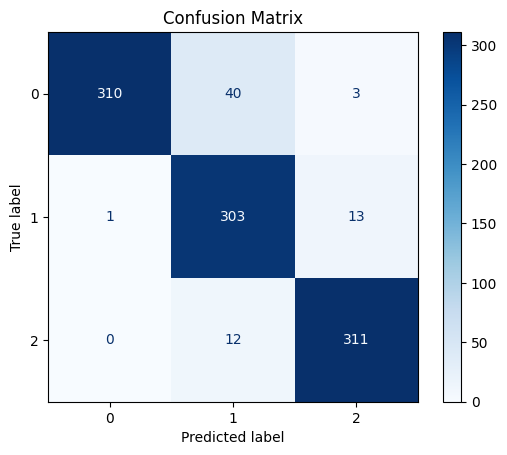

In [35]:
cm = confusion_matrix(y_test, svm.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

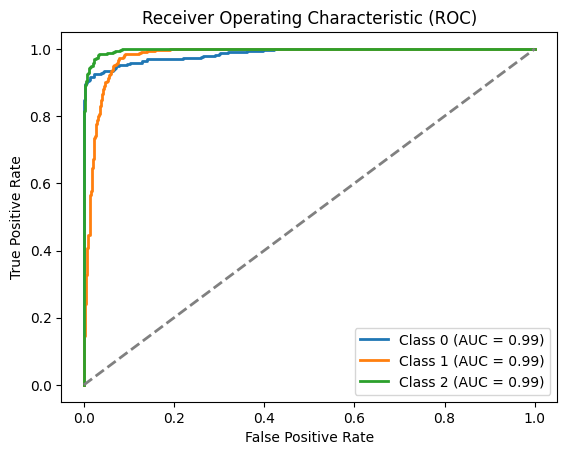

AUC: 0.99


In [36]:
y_prob = svm.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(svm.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(svm.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for SVM:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in svm_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for SVM: {:.4f}".format(svm_grid_search.best_score_))

Best Hyperparameters for SVM:
+-----------+-------+
| Parameter | Value |
+-----------+-------+
|     C     |  100  |
|   gamma   |  0.1  |
|   kernel  |  rbf  |
+-----------+-------+
Best Accuracy for SVM: 0.9829


In [38]:
cv_scores = cross_val_score(SVC(**svm_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best SVM Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best SVM Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9830
CV Standard Deviation: 0.0020


#### LGBMClassifier

In [16]:
lgbm = LGBMClassifier()
train_times = []
start = time.time()
lgbm.fit(X_train, y_train)
acc = accuracy_score(y_test, lgbm.predict(X_test))
pre = precision_score(y_test, lgbm.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, lgbm.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, lgbm.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, lgbm.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['LGBMClassifier'])
print(df_results)
print()
print(classification)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5102
[LightGBM] [Info] Number of data points in the train set: 3461, number of used features: 21
[LightGBM] [Info] Start training from score -1.097457
[LightGBM] [Info] Start training from score -1.100058
[LightGBM] [Info] Start training from score -1.098323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                    Time  Accuracy  Precision    Recall        F1
LGBMClassifier  0.285277  0.959248   0.959015  0.959248  0.959108

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       496
           1       0.89      0.87      0.88       101
           2       0.95      0.98      0.96        41

    accuracy                           0.96       638
   macro avg       0.94      0.94      0.94       638
weighted avg    

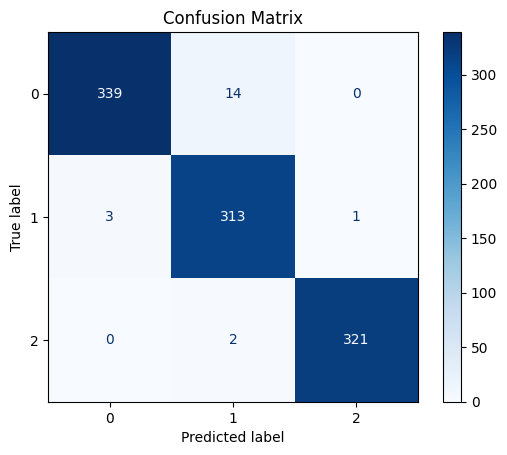

In [11]:
cm = confusion_matrix(y_test, lgbm.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

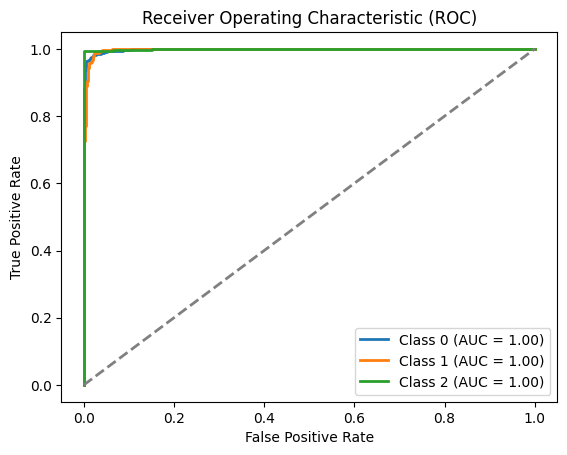

AUC: 1.00


In [12]:
y_prob = lgbm.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(lgbm.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(lgbm.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
lgbm_param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'min_child_samples': [20, 30] 
}

lgbm_model = LGBMClassifier()
lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for LGBMClassifier:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in lgbm_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for LGBMClassifier: {:.4f}".format(lgbm_grid_search.best_score_))

In [ ]:
cv_scores = cross_val_score(LGBMClassifier(**lgbm_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best LGBMClassifier Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best Decision Tree Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9540
CV Standard Deviation: 0.0070


#### XGBClassifier

In [17]:
xgb = XGBClassifier()
train_times = []
start = time.time()
xgb.fit(X_train, y_train)
acc = accuracy_score(y_test, xgb.predict(X_test))
pre = precision_score(y_test, xgb.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, xgb.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, xgb.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, xgb.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['XGBClassifier'])
print(df_results)
print()
print(classification)

                  Time  Accuracy  Precision    Recall        F1
XGBClassifier  0.31118  0.951411    0.95162  0.951411  0.951478

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       496
           1       0.86      0.86      0.86       101
           2       0.91      0.95      0.93        41

    accuracy                           0.95       638
   macro avg       0.91      0.93      0.92       638
weighted avg       0.95      0.95      0.95       638



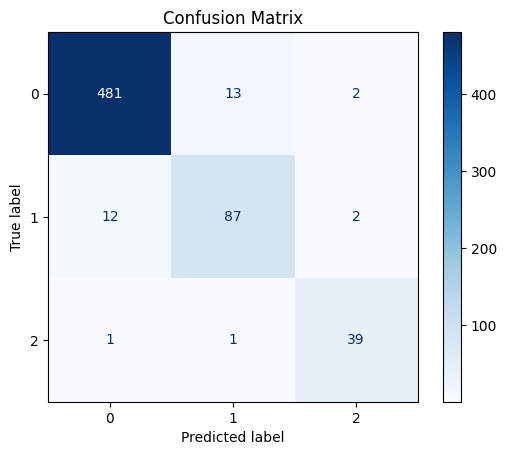

In [27]:
cm = confusion_matrix(y_test, xgb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

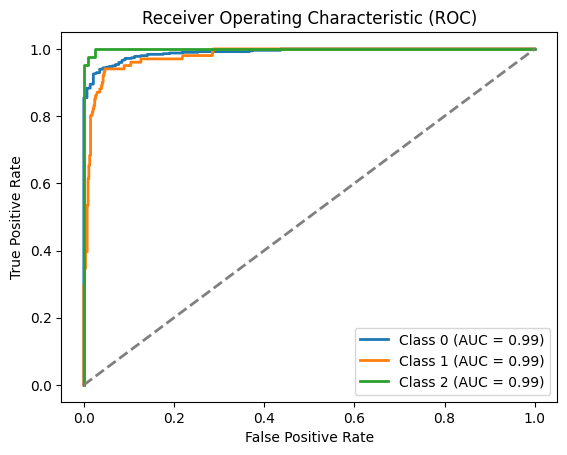

AUC: 0.99


In [28]:
y_prob = xgb.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(xgb.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(xgb.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [46]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],           
    'n_estimators': [100, 200, 300], 
    'subsample': [0.8, 1.0],          
    'colsample_bytree': [0.8, 1.0],    
    'gamma': [0, 0.1, 1],             
    'min_child_weight': [1, 5]           
}

xgb_model = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for XGBClassifier:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in xgb_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for XGBClassifier: {:.4f}".format(xgb_grid_search.best_score_))

Best Hyperparameters for XGBClassifier:
+------------------+-------+
|    Parameter     | Value |
+------------------+-------+
| colsample_bytree |  1.0  |
|      gamma       |   0   |
|  learning_rate   |  0.2  |
|    max_depth     |   7   |
| min_child_weight |   1   |
|   n_estimators   |  300  |
|    subsample     |  0.8  |
+------------------+-------+
Best Accuracy for XGBClassifier: 0.9846


In [47]:
cv_scores = cross_val_score(XGBClassifier(**xgb_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best XGBClassifier Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best XGBClassifier Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9850
CV Standard Deviation: 0.0050


#### GradientBoostingClassifier

In [18]:
gradient = GradientBoostingClassifier()
train_times = []
start = time.time()
gradient.fit(X_train, y_train)
acc = accuracy_score(y_test, gradient.predict(X_test))
pre = precision_score(y_test, gradient.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, gradient.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, gradient.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, gradient.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['GradientBoostingClassifier'])
print(df_results)
print()
print(classification)

                                Time  Accuracy  Precision    Recall        F1
GradientBoostingClassifier  3.594766  0.945141   0.946942  0.945141  0.945793

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       496
           1       0.81      0.87      0.84       101
           2       0.95      1.00      0.98        41

    accuracy                           0.95       638
   macro avg       0.91      0.94      0.93       638
weighted avg       0.95      0.95      0.95       638



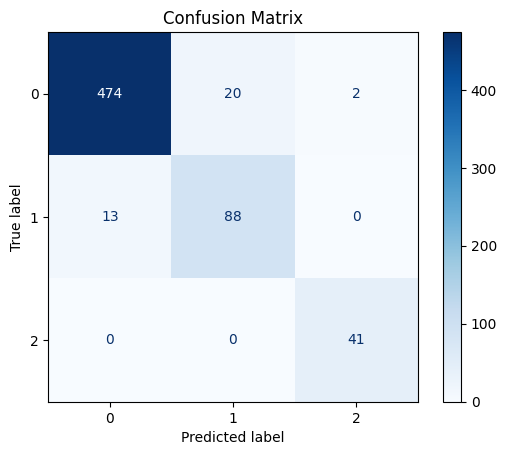

In [30]:
cm = confusion_matrix(y_test, gradient.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

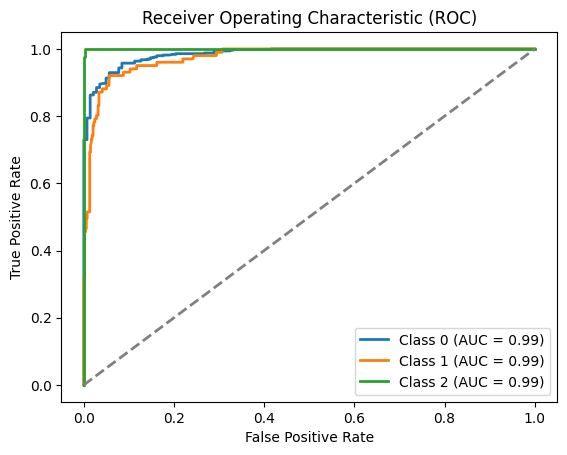

AUC: 0.99


In [31]:
y_prob = gradient.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(gradient.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(gradient.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
gradient_param_grid = {
    'n_estimators': [100, 200, 300],        
    'learning_rate': [0.01, 0.1, 0.2],     
    'max_depth': [3, 4, 5],              
    'min_samples_split': [2, 3, 4],       
    'min_samples_leaf': [1, 2, 3]       
}

gradient_model = GradientBoostingClassifier()
gradient_grid_search = GridSearchCV(gradient_model, gradient_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gradient_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for Gradient Boosting:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in gradient_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for Gradient Boosting: {:.4f}".format(gradient_grid_search.best_score_))

In [ ]:
cv_scores = cross_val_score(GradientBoostingClassifier(**gradient_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best Gradient Boosting Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best Decision Tree Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9540
CV Standard Deviation: 0.0070


#### CatBoostClassifier

In [19]:
cat = CatBoostClassifier()
train_times = []
start = time.time()
cat.fit(X_train, y_train)
acc = accuracy_score(y_test, cat.predict(X_test))
pre = precision_score(y_test, cat.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, cat.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, cat.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, cat.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['CatBoostClassifier'])
print(df_results)
print()
print(classification)

Learning rate set to 0.084299
0:	learn: 0.9919781	total: 114ms	remaining: 1m 53s
1:	learn: 0.9088448	total: 127ms	remaining: 1m 3s
2:	learn: 0.8354090	total: 135ms	remaining: 45s
3:	learn: 0.7779956	total: 143ms	remaining: 35.7s
4:	learn: 0.7296337	total: 153ms	remaining: 30.5s
5:	learn: 0.6868799	total: 159ms	remaining: 26.3s
6:	learn: 0.6421075	total: 165ms	remaining: 23.4s
7:	learn: 0.6008873	total: 169ms	remaining: 21s
8:	learn: 0.5686394	total: 173ms	remaining: 19s
9:	learn: 0.5360543	total: 177ms	remaining: 17.5s
10:	learn: 0.5055663	total: 181ms	remaining: 16.3s
11:	learn: 0.4792214	total: 185ms	remaining: 15.2s
12:	learn: 0.4572729	total: 189ms	remaining: 14.3s
13:	learn: 0.4344449	total: 193ms	remaining: 13.6s
14:	learn: 0.4169975	total: 197ms	remaining: 12.9s
15:	learn: 0.3981060	total: 202ms	remaining: 12.4s
16:	learn: 0.3834674	total: 206ms	remaining: 11.9s
17:	learn: 0.3676283	total: 210ms	remaining: 11.5s
18:	learn: 0.3533600	total: 214ms	remaining: 11.1s
19:	learn: 0.340

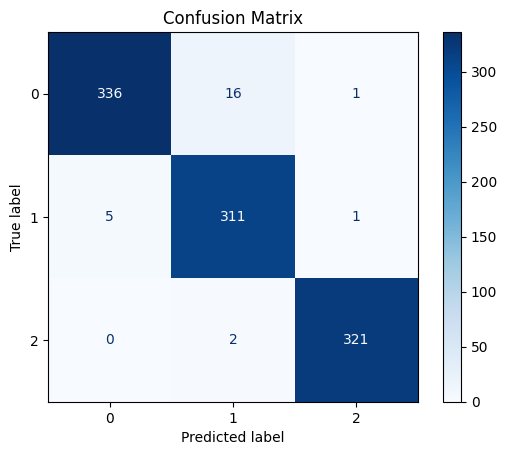

In [65]:
cm = confusion_matrix(y_test, cat.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

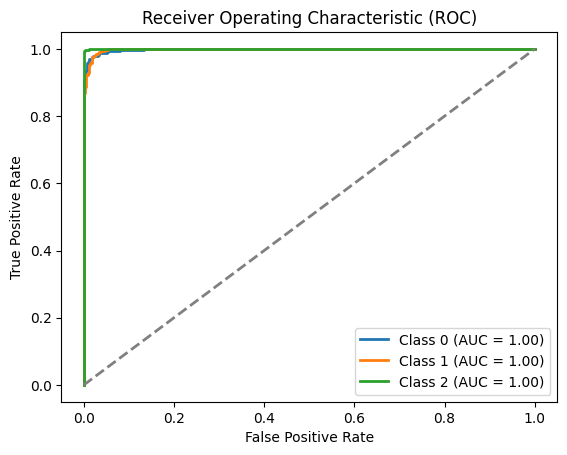

AUC: 1.00


In [66]:
y_prob = cat.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(cat.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(cat.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
cat_param_grid = {
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]       
}

cat_model = CatBoostClassifier()
cat_grid_search = GridSearchCV(cat_model, cat_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cat_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for CatBoost:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in cat_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for CatBoost: {:.4f}".format(cat_grid_search.best_score_))

In [ ]:
cv_scores = cross_val_score(CatBoostClassifier(**cat_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best CatBoost Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best Decision Tree Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9540
CV Standard Deviation: 0.0070


#### ExtraTreesClassifier

In [20]:
extra = ExtraTreesClassifier()
train_times = []
start = time.time()
extra.fit(X_train, y_train)
acc = accuracy_score(y_test, extra.predict(X_test))
pre = precision_score(y_test, extra.predict(X_test), average='weighted', zero_division=0)
rec = recall_score(y_test, extra.predict(X_test), average='weighted', zero_division=0)
f1 = f1_score(y_test, extra.predict(X_test), average='weighted', zero_division=0)
classification = classification_report(y_test, extra.predict(X_test))
end = time.time()
train_times.append(end - start)
df_results = pd.DataFrame({'Time': train_times, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}, index=['ExtraTreesClassifier'])
print(df_results)
print()
print(classification)

                          Time  Accuracy  Precision    Recall       F1
ExtraTreesClassifier  0.259866  0.943574   0.944619  0.943574  0.94395

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       496
           1       0.83      0.84      0.84       101
           2       0.84      0.93      0.88        41

    accuracy                           0.94       638
   macro avg       0.88      0.91      0.90       638
weighted avg       0.94      0.94      0.94       638



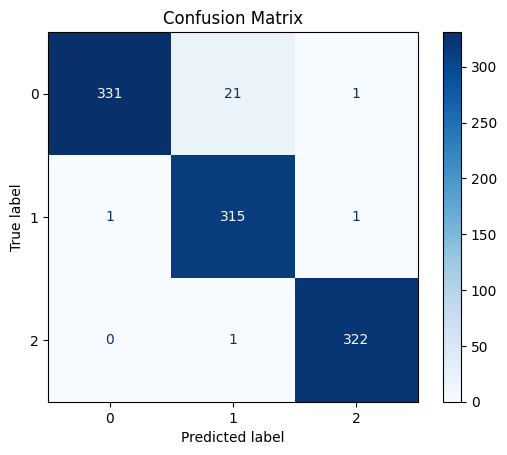

In [68]:
cm = confusion_matrix(y_test, extra.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

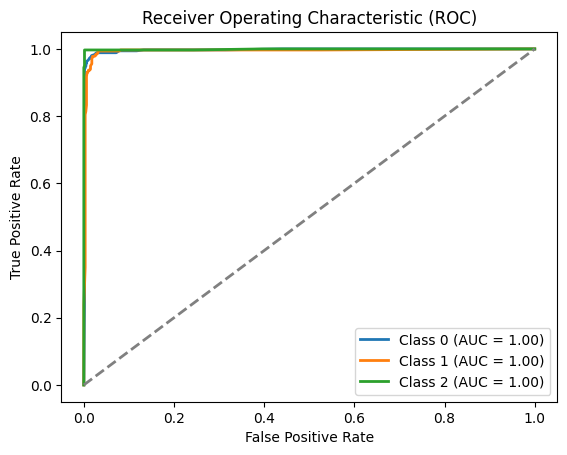

AUC: 1.00


In [69]:
y_prob = extra.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(extra.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(extra.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
extra_param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]    
}

extra_model = ExtraTreesClassifier()
extra_grid_search = GridSearchCV(extra_model, extra_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
extra_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for ExtraTrees:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in extra_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for ExtraTrees: {:.4f}".format(extra_grid_search.best_score_))

In [ ]:
cv_scores = cross_val_score(ExtraTreesClassifier(**extra_grid_search.best_params_), X_train, y_train, cv=5, scoring='accuracy')
print("Best ExtraTrees Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best Decision Tree Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9540
CV Standard Deviation: 0.0070


#### StakingClassifier

In [ ]:
base_models = [
    ('knn', KNeighborsClassifier(**knn_grid_search.best_params_)),
    ('logis', LogisticRegression(**logis_grid_search.best_params_)),
    ('rf', RandomForestClassifier(**rf_grid_search.best_params_)),
    ('svm', SVC(probability=True, **svm_grid_search.best_params_)),
    ('lgbm', LGBMClassifier(**lgbm_grid_search.best_params_)),
    ('xgb', XGBClassifier(**xgb_grid_search.best_params_)),
    ('gradient', GradientBoostingClassifier(**gradient_grid_search.best_params_)),
    ('cat', CatBoostClassifier(verbose=0, **cat_grid_search.best_params_)),
    ('extra', ExtraTreesClassifier(**extra_grid_search.best_params_))
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

start_time = time.time()
stacking_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Stacking Model - Training time: {training_time:.2f} seconds")

y_pred = stacking_model.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred=stacking_model.predict(X_test))
pre = precision_score(y_test, stacking_model.predict(X_test), average='weighted')
rec = recall_score(y_test, stacking_model.predict(X_test), average='weighted')
f1 = f1_score(y_test, stacking_model.predict(X_test), average='weighted')

df_results = pd.DataFrame({'Time': [training_time], 'Accuracy': [acc], 'Precision': [pre], 'Recall': [rec], 'F1': [f1]}, index=['StackingClassifier'])
print(df_results)
print(classification_report(y_test, stacking_model.predict(X_test)))

In [ ]:
cm = confusion_matrix(y_test, stacking_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.title("Stacking Model - Confusion Matrix")
plt.show()

In [ ]:
y_prob = stacking_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

fpr, tpr, thresholds = {}, {}, {}

for i in range(len(stacking_model.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(stacking_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i+1} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking Model - ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


In [ ]:
joblib.dump(knn, 'knn.pkl')
joblib.dump(logis, 'logistic.pkl')
joblib.dump(decision, 'decision.pkl')
joblib.dump(rf, 'randomforest.pkl')
joblib.dump(svm , 'svc.pkl')
joblib.dump(lgbm , 'lgbm.pkl')
joblib.dump(xgb , 'xgboost.pkl')
joblib.dump(gradient , 'gradient.pkl')
joblib.dump(cat  , 'catboost.pkl')
joblib.dump(extra  , 'extratree.pkl')

['extratree.pkl']